In [6]:
import pandas as pd
import numpy as np 
import seaborn as sns

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering

In [2]:
from enum import Enum 

class DATASET(Enum):
	CELEBA_L = "celeba_buffalo_l"
	CELEBA_S = "celeba_buffalo_s"

class DATA_CATEGORY(Enum):
	FEATURES = "features"
	EMBEDDINGS = "embeddings"

class PROJECTION(Enum):
	UMAP = "umap"
	TSNE = "tsne_exaggeration_12"

In [4]:
dataset = pd.read_parquet(f"../data/{DATASET.CELEBA_L.value}__{DATA_CATEGORY.EMBEDDINGS.value}.gzip")
dataset

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_502,embedding_503,embedding_504,embedding_505,embedding_506,embedding_507,embedding_508,embedding_509,embedding_510,embedding_511
0,1.441545,2.393396,-1.003623,0.122308,1.842565,-1.090654,0.968768,-0.160028,-1.140183,-0.803360,...,0.657348,-1.484989,-0.136410,-1.090225,-1.596338,-0.110376,0.900254,0.341207,0.462908,-0.673743
1,-0.513956,-0.054110,-0.041697,1.244457,-0.930742,0.030254,0.491898,1.462660,-0.067617,0.403593,...,0.935361,-0.510537,1.625798,0.871837,2.200004,0.998827,-0.397962,0.390829,0.194029,0.992391
2,1.075346,0.380185,0.436007,-0.507009,-0.696099,1.786359,-1.040563,-0.498421,-0.720458,-0.333438,...,-1.637391,-0.645637,0.012643,-0.320423,-0.697942,-1.986939,1.115830,-1.022141,0.347849,-0.710683
3,-1.108241,1.665860,0.904464,-1.106271,-1.015055,0.256345,-0.403926,-0.500956,1.580117,-0.811156,...,0.939887,0.983840,1.101034,0.255945,-0.935750,-1.363179,-0.894348,-0.651322,0.674887,-1.069576
4,0.472541,1.206789,0.675895,0.052689,0.906199,0.981983,1.308634,1.814266,0.228123,-0.133187,...,0.562390,-0.168269,0.474727,1.060535,-0.073372,-0.600600,0.203963,0.013085,0.170634,-0.035556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30007,-1.027609,0.038051,0.678272,-0.681806,-0.403177,-0.697944,-0.852238,-0.924309,-0.033749,-1.113889,...,0.687267,0.585606,-1.839872,-1.158070,-1.340626,0.191280,-0.838924,1.343969,0.039965,0.085690
30008,-1.075066,0.667526,-0.520191,0.316831,0.578368,-1.846013,0.937127,-0.874951,-1.410228,0.426055,...,-1.628014,0.137390,1.368412,0.890583,-0.214811,1.125041,0.344662,0.062554,-0.456123,-0.207488
30009,-0.755745,0.685346,-0.054518,0.747713,0.050222,0.312256,1.024764,-0.069925,0.290415,-0.240367,...,1.086413,0.375387,0.951661,-0.471971,-0.000432,-1.310920,0.981951,-0.705259,-0.012826,-2.372355
30010,-0.876157,-0.433229,0.477012,1.509275,-0.158951,0.468560,-0.504834,0.589195,-0.569086,-0.628213,...,0.382717,-0.364226,1.077819,0.140129,-1.189182,0.159892,0.006826,-1.023947,1.163164,1.535108


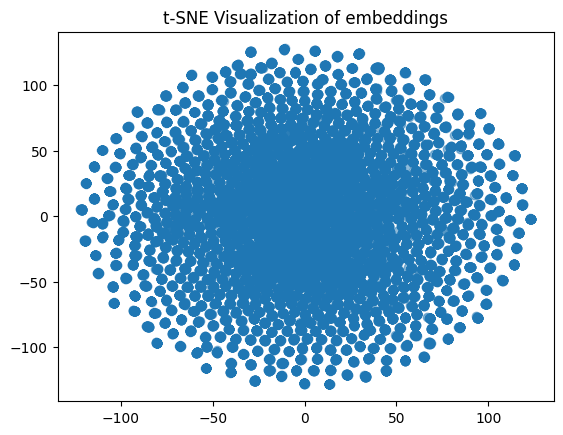

In [7]:
tsne = TSNE(n_components=2, perplexity = 50, random_state=42)
data_projected = tsne.fit_transform(dataset)

# Scatter plot for visualization
plt.scatter(data_projected[:, 0], data_projected[:, 1], alpha=0.5)
plt.title(f't-SNE Visualization of {DATA_CATEGORY.EMBEDDINGS.value}')
plt.show()

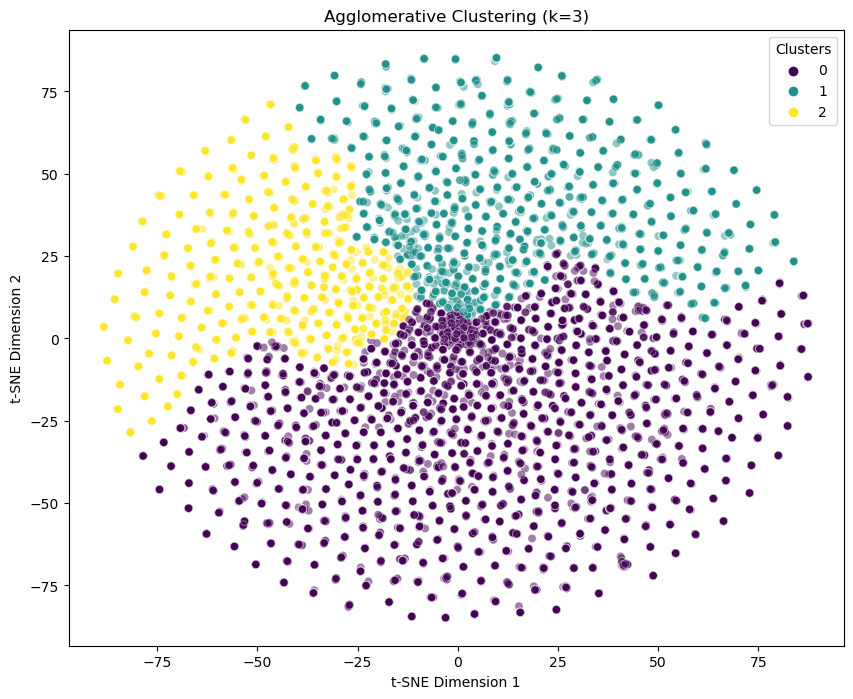

In [23]:
n_clusters = 3

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clustering.fit_predict(dataset)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_projected[:, 0], y=data_projected[:, 1], hue=cluster_labels, palette='viridis', alpha=0.5)

plt.title(f'Agglomerative Clustering (k={n_clusters})')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.legend(title='Clusters', loc='upper right')
plt.show()
